In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from source.mfa import MFA
from source.mfa_utils import sample_from_mfa_and_plot, RUN_DIR, SAVED_GMM_FILE

In [9]:
gmm_model = MFA()
gmm_model.load(os.path.join(RUN_DIR, SAVED_GMM_FILE))

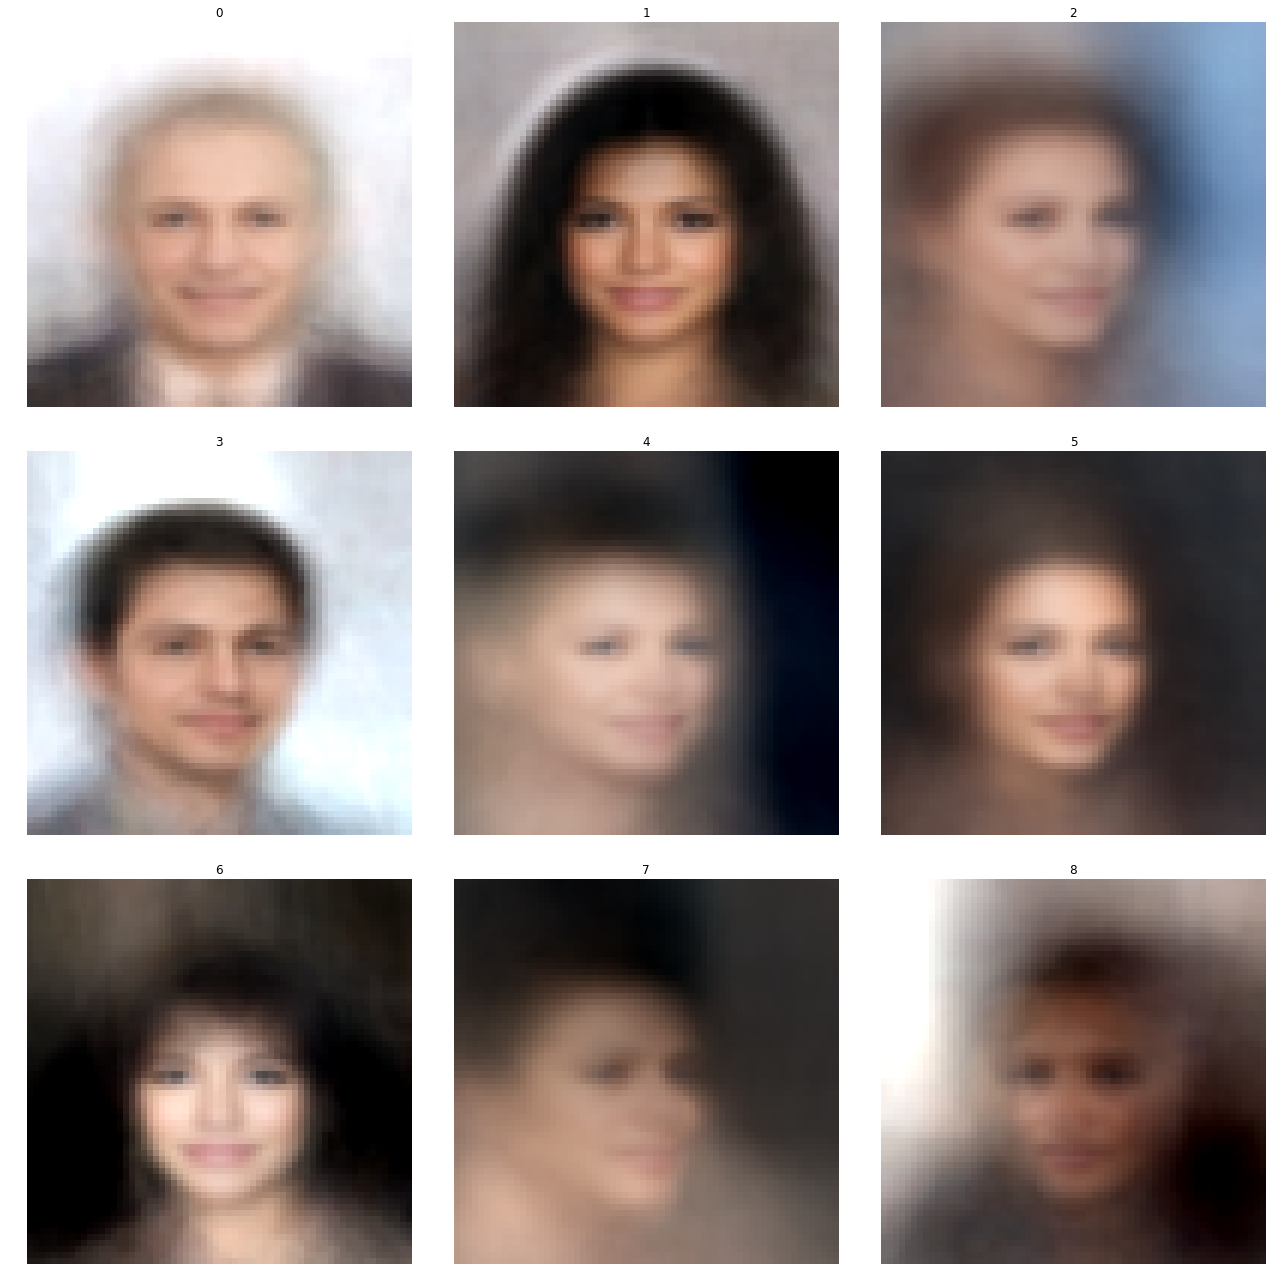

In [14]:
sample_from_mfa_and_plot(gmm_model)